In [229]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Loading and Scaling Data From Train Data **Set**

In [230]:
df=pd.read_csv('/content/1644871288_9762487_cleveland-train.csv')
X = (df[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg'	,'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']])
Y = np.array(df['heartdisease::category|-1|1'])
cols_to_scale = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg'	,'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']
X_new= X[cols_to_scale]
#scale each of the features in your training data by subtracting the mean and dividing by the standard deviation
X_new = X_new[cols_to_scale].apply( lambda x:(x - x.mean())/x.std(), axis =0)
X_new = np.array(X_new)
#append an intercept =1 as x0 feature
intercept = np.ones((X_new.shape[0], 1))
X_new=np.concatenate((intercept, X_new), axis=1)

In [231]:
#dividing Data set into train and test samples
X_train, X_test, y_train, y_test = train_test_split(
   X_new ,Y, test_size = 0.25)

# Function to predict values and calculate classification Error

In [232]:
def prediction(X,y,w):
  predict_value=1 / (1 + np.exp(-(np.dot(X,w))))
  fins= np.array([1 if i >= 0.5 else -1 for i in predict_value])
  accuracy = 0
  for i in range(fins.size):
      if fins[i] == y[i]: 
          accuracy += 1
  acc = accuracy / fins.size
  return 1-acc

# Gradient Descent Training Function

In [233]:
def Gradient_descent_train(X, y,itr,eta,tol):
  all_csts = []
  #initial values of weights as zero
  w = np.zeros(X.shape[1]) 
  for each_iter in range (itr):
    #gradient value based on slides in logistic regression 2
    gradient=-(1/y.shape[0])*np.sum((X*y[:, np.newaxis])*(1.0 / (1 + np.exp(y*(np.dot(X,w)))))[:, np.newaxis],axis=0)
    #if gradient terms fall below tolerance level the algorithm terminates
    if(np.all(gradient<tol)):
      break
    else:
      #weights are updated based on gradient and eta values
      w -= eta * gradient
      #cross-entropy loss equation
      cross_entropy=(1/y.shape[0])*np.sum(np.log(1+np.exp(-(y*(np.dot(X,w))))))
      all_csts.append(cross_entropy)
      each_iter += 1
      # if each_iter % 1000 == 0:
      #     print('Iteration: ', each_iter, 'Cost: ', cross_entropy)
      #     each_iter += 1
  classification_error=prediction(X_test,y_test,w)
  return w,cross_entropy,classification_error,itr,all_csts,each_iter

In [234]:
w,cross_entropy,classification_error,itr,all_csts,each_iter=Gradient_descent_train(X_train,y_train,100000,0.0001,0.000001)

In [235]:
print('Weights :',w[1:])
print('Intercept:' , w[0])
print('cross_entropy_error: ',cross_entropy)
print('Classification error:',classification_error)
print('iteration stop at',each_iter)

Weights : [ 0.10884186  0.33827215  0.27094481  0.36197531  0.11126836 -0.21097818
  0.10881493 -0.19878092  0.31813957  0.38820435  0.28762043  0.65383532
  0.49646613]
Intercept: -0.25234292792862445
cross_entropy_error:  0.41292898090392705
Classification error: 0.1842105263157895
iteration stop at 100000


Graph to plot the behaviour of cross entropy loss with respect to the iterations

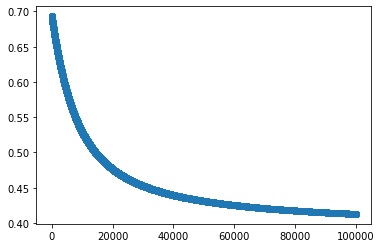

In [236]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.scatter( range(itr), all_csts)

# Load Test Data and Perform Scaling

In [237]:
dft=pd.read_csv('/content/1644871288_9775174_cleveland-test.csv')
X_t = (dft[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg'	,'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']])
cols_to_scale_t = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg'	,'thalach',	'exang',	'oldpeak',	'slope'	,'ca',	'thal']
X_new_t= X_t[cols_to_scale_t]
X_new_t = X_new_t[cols_to_scale_t].apply( lambda y:(y - y.mean())/y.std(), axis =0)
X_new_t = np.array(X_new_t)
# X_new_t=X_t
intercept = np.ones((X_new_t.shape[0], 1))
X_new_t=np.concatenate((intercept, X_new_t), axis=1)


In [238]:
test_prediction =1 / (1 + np.exp(-(np.dot(X_new_t,w))))

In [239]:
#With threshold 0.5 we classify the probabilistic values
finale = [1 if i >= 0.5 else -1 for i in test_prediction]
spw= np.array(finale)
spw.tofile('/content/sample.csv',sep=',')

# Logistic Regression From HW1

In [240]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
   X_new ,Y)
model = LogisticRegression(C = 1.0,random_state=0)
model.fit(X_train_2, y_train_2)
predicted_value = model.predict(X_test_2)
correctly_predicted = predicted_value == y_test_2
accuracy = np.mean(correctly_predicted) * 100
print (accuracy)

81.57894736842105


In [241]:
predicted_values = model.predict(X_new_t)
sp= np.array(predicted_values)
sp.tofile('/content/sample_sklog.csv',sep=',')